## Ensemble Forecasts

This notebook demonstrates a basic ensemble forecast. 

In [1]:
import matplotlib.pyplot as plt
from pv_model import model_pv_power
from forecast_solar import get_solar_forecast_ensemble
import pandas as pd

Define input variables. Right now, this function only works with ECMWF IFS, but NOAA GEFS may be added in the future. 

The function gets an irradiance forecast using the same approach for IFS in `get_solar_forecast_fast()`, but for multiple ensemble members (up to 50). For temperature, it only gets the ensemble mean, and for wind speed, it jus fills in 2 m/s to speed things up a bit. 

In [2]:
init_date = pd.to_datetime('2024-04-10 12:00')
latitude = [33.5, 32, 33]
longitude = [-88.5, -89, -91]
num_members = 5 # up to 50 for IFS
run_length = 48 # needs to be multiple of 6
lead_time_to_start = 18 # needs to be a multiple of 6
model='ifs'

Run the function:

In [3]:
resource = get_solar_forecast_ensemble(
    latitude, longitude, init_date, run_length,
    lead_time_to_start, model, num_members, attempts=2)

And plot the results:

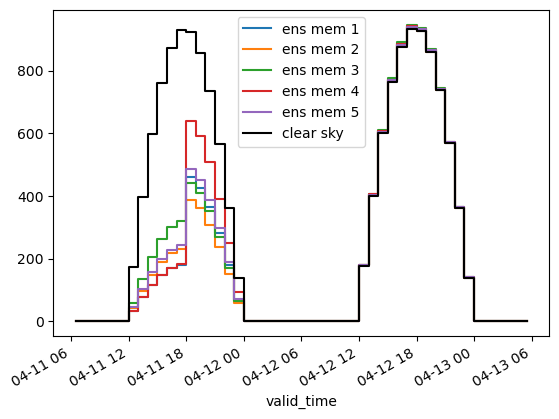

In [4]:
member_list = resource['member'].unique()
point = 0
for member in member_list:
    resource[(resource['member'] == member) & (resource['point'] == point)]['ghi'].plot(label=('ens mem ' + str(member)), drawstyle='steps-mid')
resource[(resource['member'] == member_list[0]) & (resource['point'] == point)]['ghi_clear'].plot(label='clear sky', color='black', drawstyle='steps-mid')
plt.legend()
plt.show()